# Agrupamento Baseado em densidade

Tem o objetivo de encontrar grupos de alta densidade (pontos por região) que sejam isolados uns dos outros.

Dada uma matriz $\mathbf{X} \in \mathbb{R}^{n \times d}$, cujas linhas são denotadas por $\mathbf{x}_1, \dots, \mathbf{x}_n$, um número real $\epsilon$ e um inteiro $\eta$, o agrupamento baseado em densidade (DBSCAN) funciona da seguinte forma:

1. Encontre os pontos em uma $\epsilon$-vizinhança. Os pontos que tiverem mais de $\eta$ vizinhos são denominados *core points*;

2. Encontre conjuntos maximais de *core points* tais que cada *core point* esteja em uma $\epsilon$-vizinhaça de ao menos um outro ponto do conjunto;

3. Associe a cada ponto que não é um *core point* ao grupo mais próximo, se a distância for inferior a $\epsilon$;

4. Todos os outros pontos são rotulados como ruído.

### Não há definição do número de grupos! O resultado é baseado nos valores de $\epsilon$ e $\eta$.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
import seaborn as sns; sns.set()
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

### Considere o mesmo exemplo do caso anterior

In [34]:
def findParameters(X, f = 1, upTo = 100):
    nbrs = NearestNeighbors(n_neighbors = upTo, algorithm='ball_tree', metric = 'l2').fit(X)
    distances, indices = nbrs.kneighbors(X)
    for i in range(f, upTo):
        y = sorted(distances[:, i].ravel())
        plt.plot(range(len(y)), y)
    plt.xlabel('Rank')
    plt.ylabel('Valores de Epsilon')

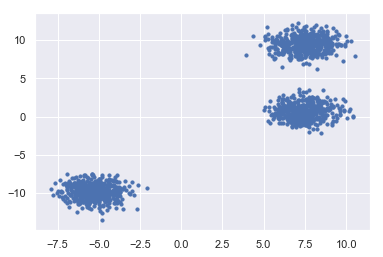

In [3]:
n_samples = 1500
np.random.seed(0)
X, _ = datasets.make_blobs(n_samples=n_samples, random_state=8)
plt.scatter(X[:, 0], X[:, 1], s=10);

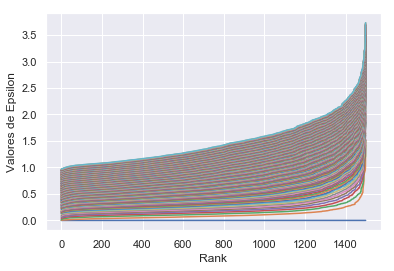

In [48]:
findParameters(X, 200)

In [4]:
from sklearn.cluster import DBSCAN

In [10]:
# não há definição do número de grupos
dbs = DBSCAN(eps = 0.001, min_samples=5, metric='cosine')

# ajustando o modelo
dbs.fit(X)

# obtendo o identificador de grupo de cada ponto
y_dbs = dbs.labels_

# índice dos pontos que são ruído (são -1)
noise = np.where(y_dbs == -1)[0]
notNoise = np.where(y_dbs != -1)[0]

### Veja que não há centroides e o número de grupos...

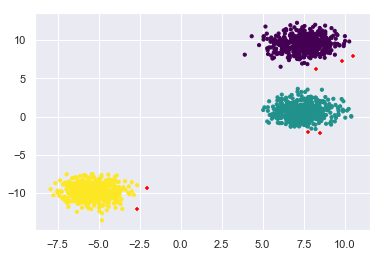

In [11]:
# visualizando os core points...
_ = plt.scatter(X[notNoise, 0], X[notNoise, 1], c=y_dbs[notNoise], s=10, cmap='viridis')

# adicionando ruído
_ = plt.scatter(X[noise, 0], X[noise, 1], color = 'red', marker = '+', s=10)

In [12]:
def applyDbs(X, eps, min_samples = None):
    if min_samples is None:
        dbs = DBSCAN(eps = eps)
    else:
        dbs = DBSCAN(eps = eps, min_samples=min_samples)
    dbs.fit(X)
    y_dbs = dbs.labels_
    noise = np.where(y_dbs == -1)[0]
    notNoise = np.where(y_dbs != -1)[0]
    _ = plt.scatter(X[notNoise, 0], X[notNoise, 1], c=y_dbs[notNoise], s=10, cmap='viridis')
    _ = plt.scatter(X[noise, 0], X[noise, 1], color = 'red', marker = '+', s=10)

In [47]:
# Grupos elípticos

random_state = 170
X, _ = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
X = X_aniso

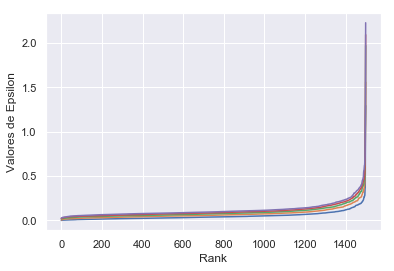

In [52]:
findParameters(X, 1, 6)

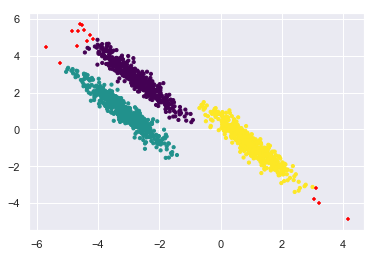

In [49]:
applyDbs(X, 0.33, 5)

In [19]:
# Ruído

X = np.random.rand(n_samples, 2)

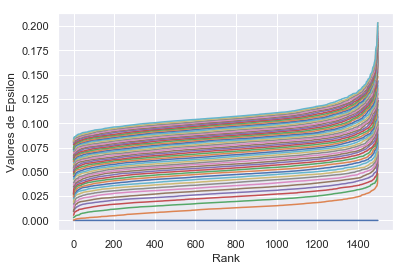

In [62]:
findParameters(X, 50)

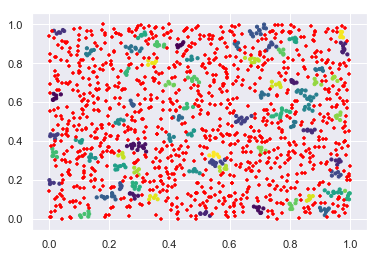

In [22]:
applyDbs(X, 0.02)

In [23]:
# Variâncias diferentes

X, _ = datasets.make_blobs(n_samples=n_samples,
                           cluster_std=[1.0, 2.5, 0.5],
                           random_state=random_state)

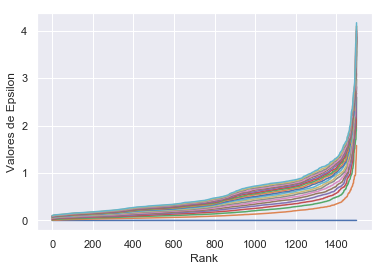

In [66]:
findParameters(X, 20)

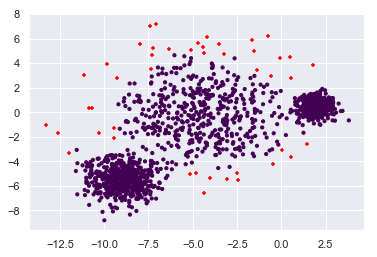

In [32]:
applyDbs(X, 1.2, 20)

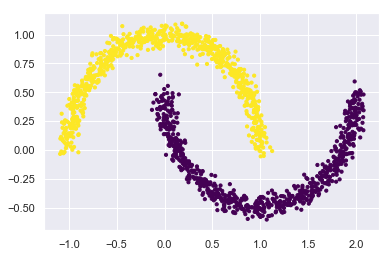

In [33]:
# luas

X, _ = datasets.make_moons(n_samples=n_samples, noise=.05)
applyDbs(X, 0.2,50)

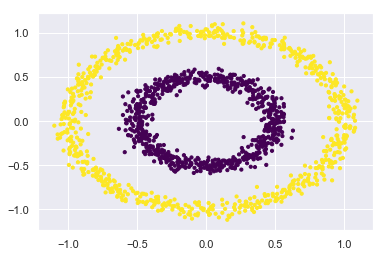

In [70]:
X, _ = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
applyDbs(X, 0.13, 15)